# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


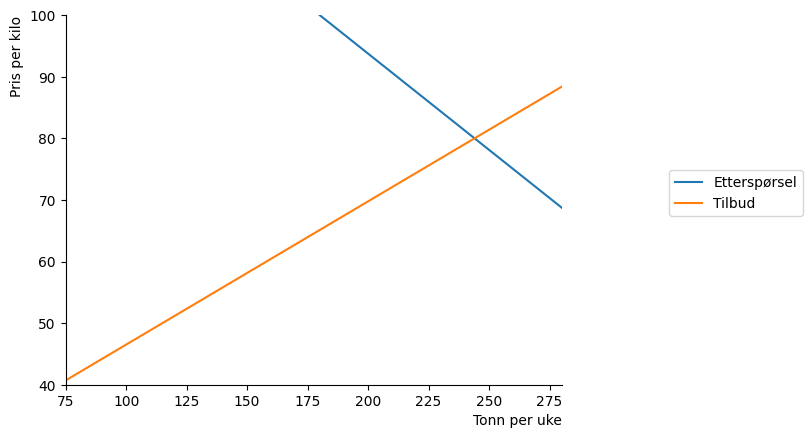

In [3]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


Oppgave 1

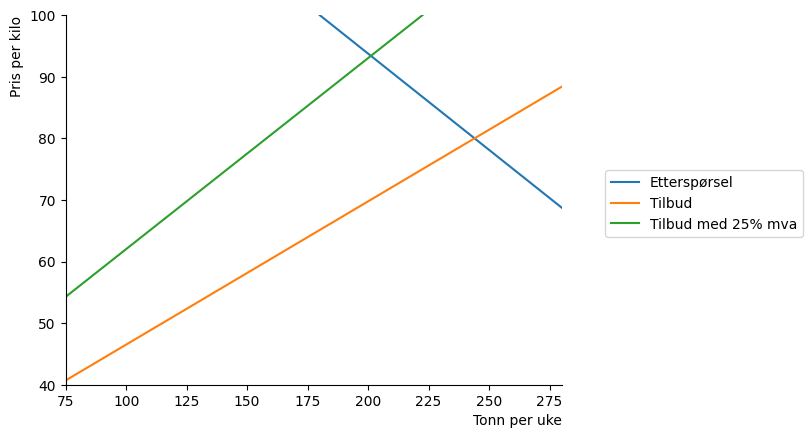

In [4]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

ax.legend(bbox_to_anchor=(1.5,0.6));

Tilbudsfunksjon med 25% mva har brattere helning enn tilbudsfunksjonen før mva fordi jo høyere prisen blir utgjør den prosentvise avgiften et større beløp. For eksempel vil merverdiavgiften utgjøre et større beløp hvis prisen per kilo er 100 kr, kontra at prisen per kilo er 50 kr. 

Oppgave 2

In [5]:
x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,t))
eq_cond

Eq(500 - 3.2*p, 4.3*p*(1 - t) - 100)

In [6]:
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-6000.0/(43.0*t - 75.0)

In [7]:
x_eq=x_s(p_eq[0],t)
x_eq

-25800.0*(1 - t)/(43.0*t - 75.0) - 100

In [8]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

-6000.0/(43.0*t - 75.0)

In [9]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

-100 + (25800.0*t - 25800.0)/(43.0*t - 75.0)

In [10]:
x_opt = round(x_eq_fn(0.25,0),2) #kvantum i den nye likevekten for tilbudsfunksjonen
x_opt 

201.17

In [11]:
x_opt1 = round(x_eq_fn(0,0.25),2) #kvantum i den gamle likevekten for tilbudet
x_opt1

244.0

In [12]:
# prisen som konsumenten må betale er
p_kons = round(p_eq_fn(0.25,0),2) # pris etter mva
p_kons

93.39

In [13]:
#prisen som produsenten får er 
p_kons1 = round(p_eq_fn(0,0.25),2) # pris før mva
p_kons1

80.0

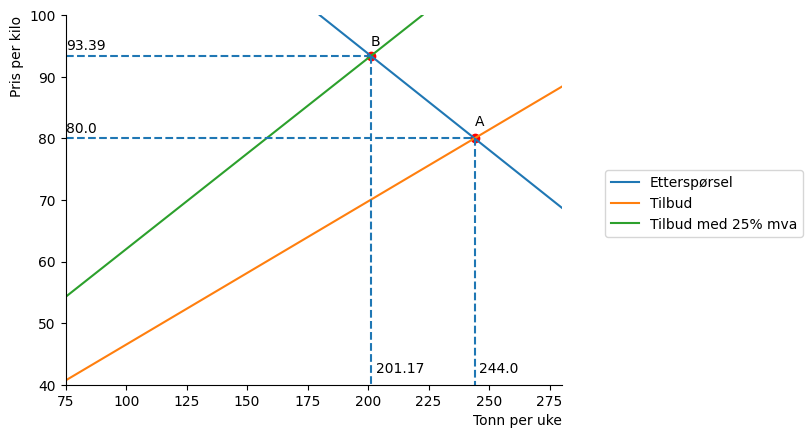

In [14]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

ax.vlines(x_eq_fn(0.25,0),93.39, 40, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(0,0.25),80, 40, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0.25,0),75,201.17, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,0.25),75,244, linestyles='dashed', clip_on=False)

ax.scatter(x_opt1, 80, color='red')
ax.scatter(x_opt, 93.39, color='red')
ax.text(201.17, 95, "B")
ax.text(244, 82, "A")
ax.annotate(x_opt1, xy=(x_opt1+2,42), annotation_clip=False)
ax.annotate(x_opt, xy=(x_opt+2,42), annotation_clip=False)
ax.annotate(p_kons1, xy=(75, p_kons1+1), annotation_clip=False)
ax.annotate(p_kons, xy=(75, p_kons+1), annotation_clip=False)

ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 3

In [15]:
p_0 = p_eq_fn(0,0) #pris før mva
p_0

80.0

In [16]:
S_i=round((p_kons-p_kons1)*x_opt*1000,2)
S_i

2693666.3

Staten vil, ved den nye likevekten, tjene $2693666.3$ kr per uke

Før avgiften ble innført er markedet i punkt A og prisen er altså 80 kr per kilo. Etter at avgiften på 25% blir innført øker prisen som konsumenter betaler med 13.39 kr mens produsenter får samme betaling. Konsumenter betaler $\frac{13.39}{13.39}*100\%=100\%$ av avgiften mens produsenter betaler 0%. 

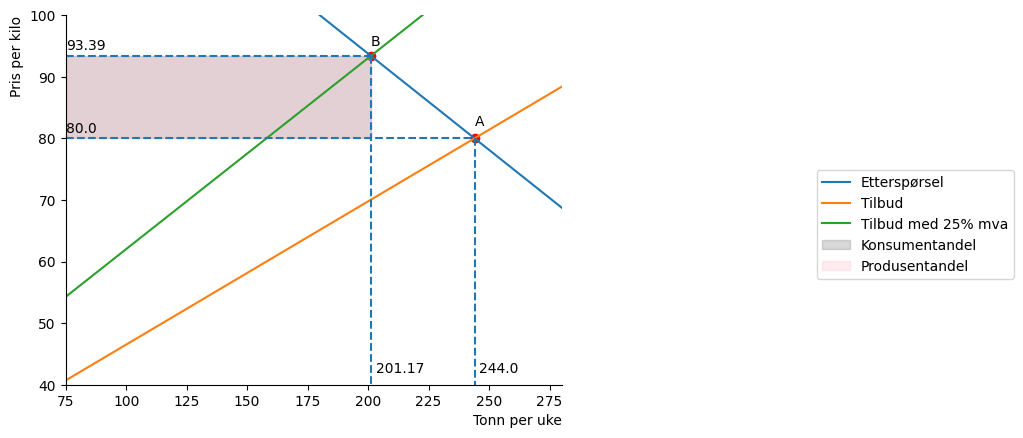

In [17]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

ax.vlines(x_eq_fn(0.25,0),93.39, 40, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(0,0.25),80, 40, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0.25,0),75,201.17, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,0.25),75,244, linestyles='dashed', clip_on=False)

ax.scatter(x_opt1, 80, color='red')
ax.scatter(x_opt, 93.39, color='red')
ax.text(201.17, 95, "B")
ax.text(244, 82, "A")
ax.annotate(x_opt1, xy=(x_opt1+2,42), annotation_clip=False)
ax.annotate(x_opt, xy=(x_opt+2,42), annotation_clip=False)
ax.annotate(p_kons1, xy=(75, p_kons1+1), annotation_clip=False)
ax.annotate(p_kons, xy=(75, p_kons+1), annotation_clip=False)

q=np.linspace (75, x_eq_fn(0.25,0), 100)
ax.fill_between(q,p_kons,p_0, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,p_0,p_kons-0.25, color = "pink",alpha = 0.3,label='Produsentandel')
ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 4

Fordelen ved mva er at staten får mer inntekt, og samtidig slepper produsentene å betale ekstra. Ulempen med mva er at forbrukerne må betale 25% ekstra for samme produkt.  

Fordelen ved stykkprisavgift er at staten får mer inntekt. Ulempen ved stykkprisavgift er at produsentene får et effektivitetstap, som følge av lavere etterspørsel og mindre tilbud. 